In [1]:
from beat_tracker.dataloading.datamodule import BeatTrackingDatamodule
from beat_tracker.utils.viz import show_spectrogram, show_beats_and_downbeats, show_beats_and_spectrogram

btdm = BeatTrackingDatamodule(tasks = ['hainsworth','ballroom','gtzan'], n_mels = 81,target_sr=44100,target_seconds=None,kfolds=None,val_split=0,test_split=0)
btdm.setup()

/homes/jpmg86/anaconda3/envs/MuMRVQ/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/homes/jpmg86/beat_tracker/beat_tracker/dataloading/datamodule.py:139: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '/import/c4dm-datasets/hainsworth/hainsworth_075.wav' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.loc[annotations['file_name'] == file, 'file_path'] = file_path
/homes/jpmg86/beat_tracker/beat_tracker/dataloading/datamodule.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '/import/c4dm-datasets/ballroom/BallroomData/VienneseWaltz/Media-104508.wav' has dtype incompatible with float64, please explicitly cast

In [2]:
# annotations['new_file_name'] = annotations['file_name'].apply(lambda x: x.replace('.wav','.npy'))

# import os 
# from tqdm import tqdm
# import numpy as np

# new_target_dir = '/import/research_c4dm/jpmg86/MusicInformatics/gtzandata/melgrams'

# if not os.path.exists(new_target_dir):
#     os.makedirs(new_target_dir)

# rows = []

# for i in tqdm(range(len(annotations))):
    
#     spec = btdm.test_dataset[i]['spectrogram']
#     file_name = annotations['new_file_name'].iloc[i]
#     beats = annotations['beats'].iloc[i]
#     downbeats = annotations['downbeats'].iloc[i]
#     file_path = os.path.join(new_target_dir,file_name)
    
#     np.save(file_path,spec)
    
#     row = {
#         'file_name':file_name,
#         'file_path':file_path,
#         'beats':beats,
#         'downbeats':downbeats,
#         'sr': btdm.target_sr,
#         'fps': btdm.fps,
#     }
    
#     rows.append(row)
    
# import pandas as pd

# df = pd.DataFrame(rows)
# df.to_json('data/gtzan_annotations_mel.json',orient='records')

In [3]:
from beat_tracker.dataloading.datamodule import BeatTrackingDatamodule
from beat_tracker.utils.viz import show_spectrogram, show_beats_and_downbeats, show_beats_and_spectrogram

btdm = BeatTrackingDatamodule(target_seconds=None,kfolds=None,val_split=0,test_split=0, target_sr=44100, tasks=['ballroom_mel'], n_mels=81)
btdm.setup()

In [4]:
len(btdm.annotations)

698

In [5]:
btdm.train_dataset[1]['spectrogram'].shape

torch.Size([1, 81, 3072])

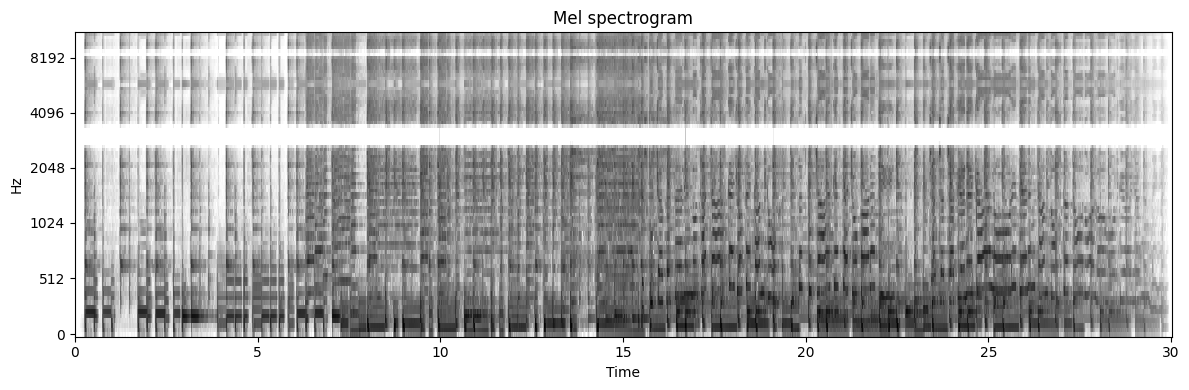

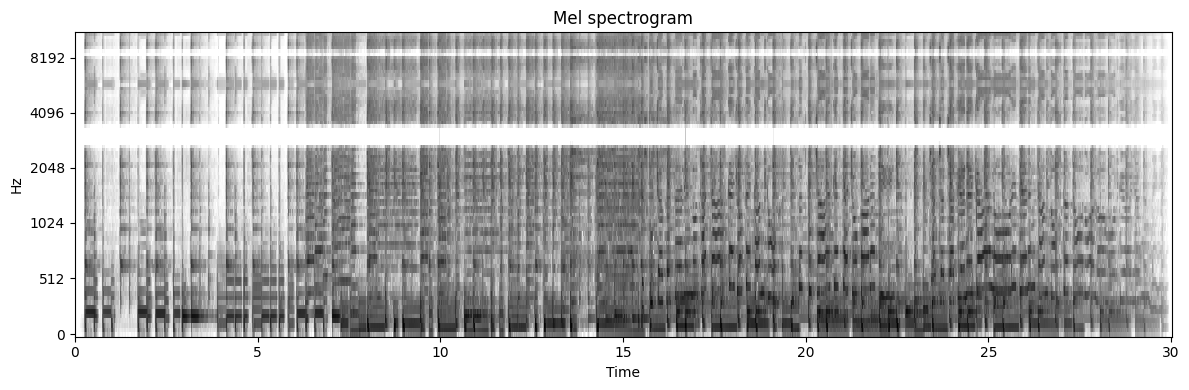

In [6]:
show_spectrogram(
    spec= btdm.train_dataset[0]['spectrogram'].squeeze().numpy(),
)

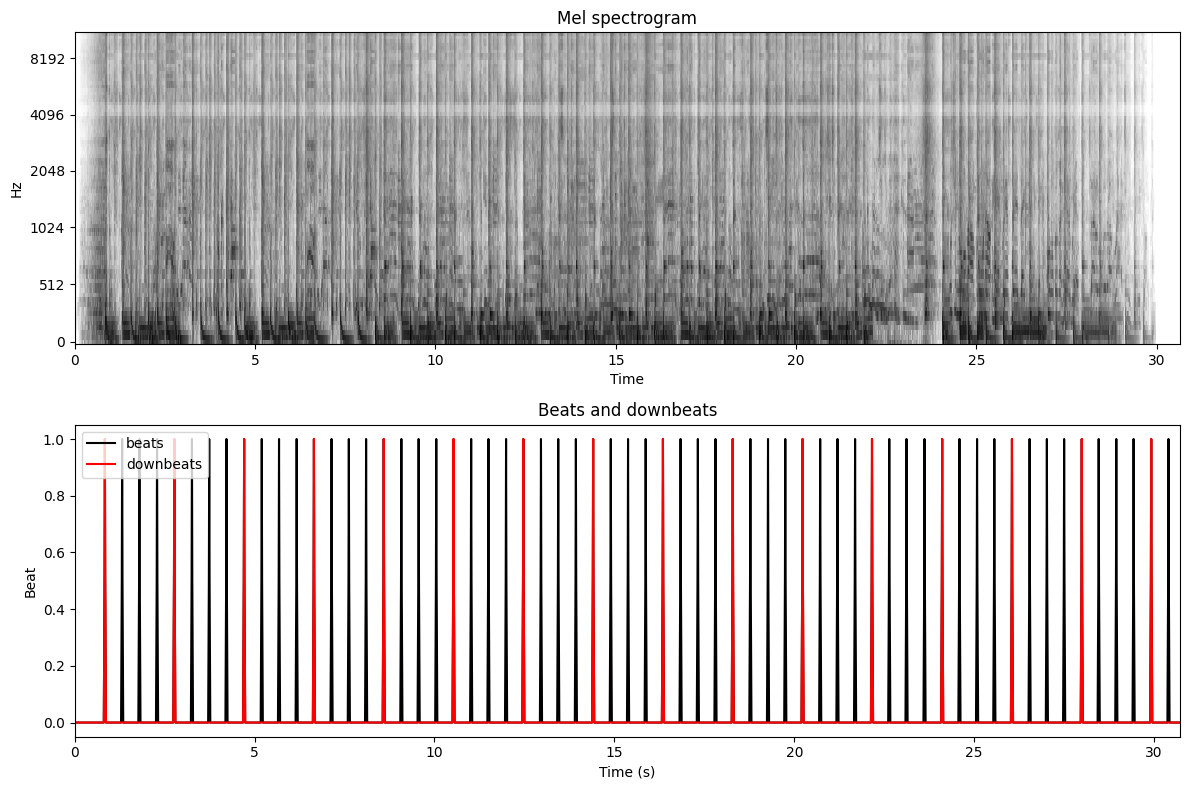

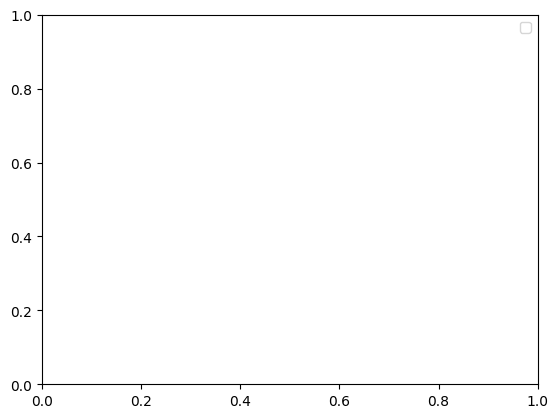

In [9]:
import matplotlib.pyplot as plt


sample = btdm.train_dataset[1]

show_beats_and_spectrogram(
    spec = sample['spectrogram'].squeeze().numpy(),
    beats = sample['beats'].squeeze().numpy(),
    downbeats= sample['downbeats'].squeeze().numpy(),
)

plt.legend(['beats','downbeats'])
